In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

y_data = pd.read_csv('HGDP/hgdp/HGDP-CEPH-ID_populations.csv')
y_data = y_data.set_index('CEPH ID')
y_data.head()

y_data['Geographic origin'].unique()

array(['Pakistan', 'Central African Republic',
       'Democratic Republic of Congo', 'Bougainville', 'France',
       'New Guinea', 'Israel (Carmel)', 'Israel (Negev)', 'Italy',
       'Israel (Central)', 'Colombia', 'Cambodia', 'Japan', 'China',
       'Orkney Islands', 'Brazil', 'Mexico', 'Russia', 'Senegal',
       'Nigeria', 'Siberia', 'Namibia', 'South Africa', 'Italy (Bergamo)',
       'Algeria (Mzab)', 'Russia Caucasus', 'Kenya'], dtype=object)

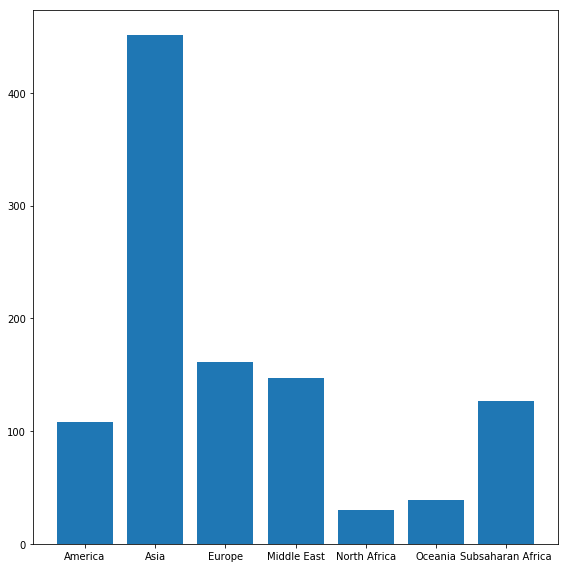

In [2]:
regions, counts = np.unique(y_data['Region'].values, return_counts=True)

f, ax = plt.subplots(figsize=(8, 8))
ax.bar(regions, counts)
plt.tight_layout()
plt.show()

# X data

In [47]:
n = 1043
col_names = []

X = pd.read_csv('data/part=0_dsize=1000.csv')
# print(X.columns)

for part in range(1, 3):
    X_part = pd.read_csv('data/part=%d_dsize=1000.csv' % part)
#     print(X_part.columns)
    X = X.merge(X_part)
    
X = X.rename({'Unnamed: 0': 'CEPH ID'}, axis='columns')
X = X.set_index('CEPH ID')
# X['Region'] = pd.Series(['?' for _ in range(len(X))], index=X.index)
# X['Geographic origin'] = pd.Series(['?' for _ in range(len(X))], index=X.index)
X['Region'] = y_data['Region']
X['Geographic origin'] = y_data['Geographic origin']

# Visualize with PCA

In [11]:
X_array = X.values[:, :-1].astype(float)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)



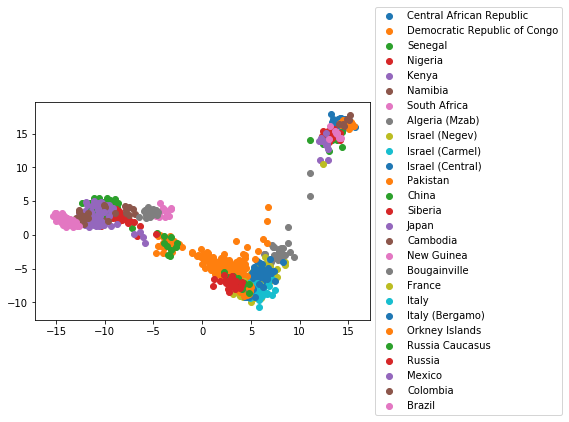

In [52]:
# print(X['Region'].unique())
            
f, ax = plt.subplots()
for region in X['Geographic origin'].unique():
    if str(region) == 'nan': 
        continue
    idx_reg = np.where(X['Geographic origin'] == region)
    points = X_pca[idx_reg, :].squeeze()
    xs, ys = points[:, 0], points[:, 1]
    
    ax.scatter(xs, ys, label=region)
    
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()

# Visualize with t-SNE

In [ ]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_array)

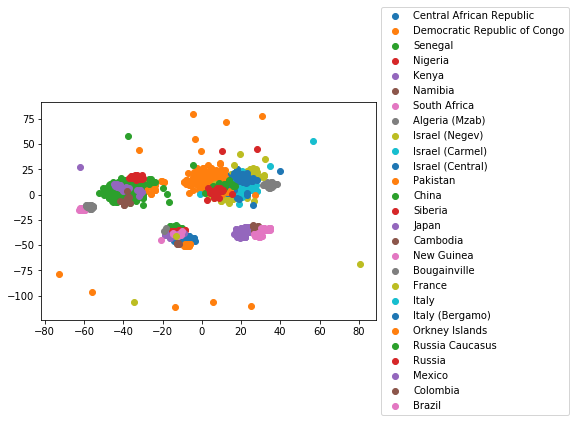

In [54]:
f, ax = plt.subplots()
for region in X['Geographic origin'].unique():
    if str(region) == 'nan': 
        continue
    idx_reg = np.where(X['Geographic origin'] == region)
    points = X_tsne[idx_reg, :].squeeze()
    xs, ys = points[:, 0], points[:, 1]
    
    ax.scatter(xs, ys, label=region)
    
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()